# From  [Pinned diffusions and Markov bridges](https://arxiv.org/pdf/1711.08617.pdf)

In [1]:
import matplotlib.pyplot as plt
from scipy import stats
from ito_diffusions import *
plt.style.use('dark_background')

In [2]:
params = {
    'font.size': 14,
    'figure.figsize': (11,14),
    'axes.labelsize': 12,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
}
plt.rcParams.update(params)

In [3]:
T = 2.0
SCHEME_STEPS = int(1e4)

## True and fake Brownian bridges

A family of bridges is a collection of diffusions obtained by conditioning the start and end points of a given diffusion process (Brownian bridges use the Brownian motion as the base diffusion). Conditioning on $X_T=y$, it follows:

$
dX_t = \frac{y-X_t}{T-t}dt + dW_t
$
<br/>

The concept of $\alpha$-pinned diffusion is a generalization of the Brownian bridge for which the mean reversion coefficient is scaled by $\alpha$ :

$
dX_t = \alpha\frac{y-X_t}{T-t}dt + dW_t
$

<br/>

This equations has a unique strong solution. One might wonder whether this solution also generates a family of bridges indexed by $y$ for a given $\alpha\neq1$. The answer is no, and the article attached provides a characterization of pinned diffusions that generates a true family of bridges.

<br/>

Graphically, it is easy to see why $\alpha\neq1$ fails to produce a true bridge. When looking at Brownian bridge sample paths, they "smoothly" diffuse around a straight backbone that links the start and end points. For other values of $\alpha$ we observe the following behaviours:
* $\alpha<1$ : the mean-reversion is too weak, the process drifts away from the backbone and "jumps" at the last moment to reach the target (it does not *really* jump since the path is continuous, but the $T-t$ at the denominator creates a spike near maturity)
* $\alpha>1$ : the mean-reversion is too strong, the process follows a curvy backbone and reaches the target "too soon".


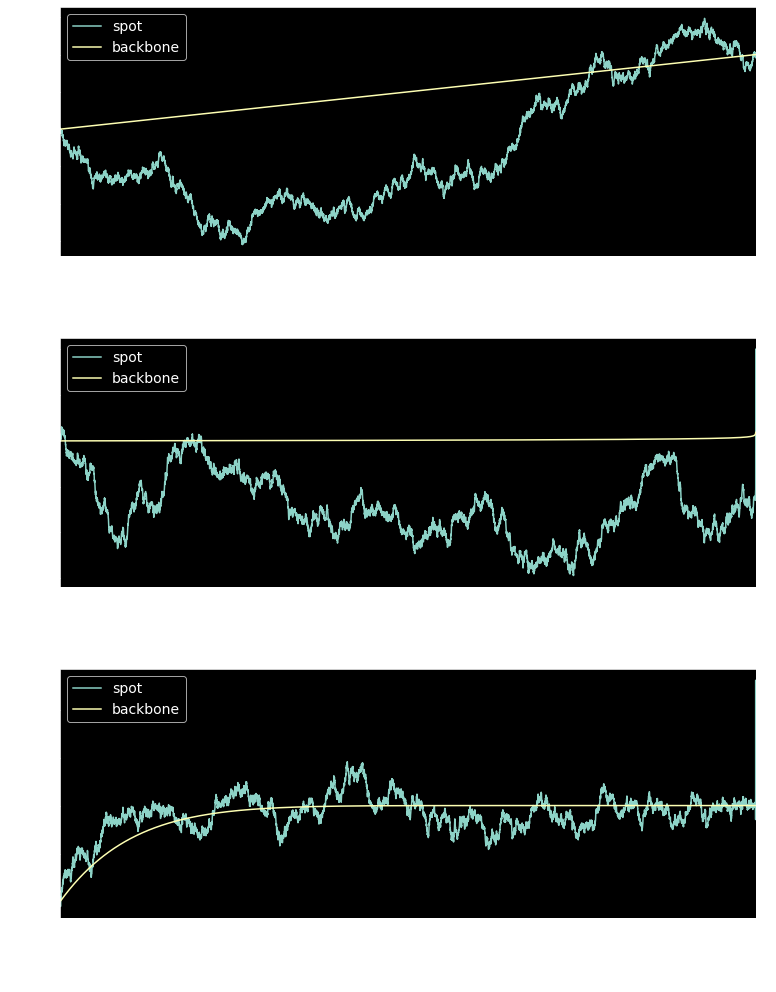

In [4]:
fig, axes = plt.subplots(nrows=3, ncols=1)

alphas = [1.0, 0.01, 10.0]

for i, ax in enumerate(axes):
    alpha = alphas[i]
    X = Alpha_pinned_BM(x0=0.0, T=T, scheme_steps=SCHEME_STEPS, alpha=alpha, vol=1.0, pin=1.0)
    df = X.simulate()
    df.plot(kind='line', ax=ax)

    ax.set_xlabel('time\nalpha={:.2}\n'.format(alpha))
    ax.set_ylabel('spot')
    ax.legend(loc='upper left')

plt.tight_layout()
plt.show()

# F-pinned diffusion

A family of pinned diffusion that yields a true family of bridges can be generated from the distribution function $F$ and the corresponding density $f$ of a probabity measure with finite support : 

$
X_t=\frac{f(t)}{1−F(t)}(y−Xt)dt+\sqrt{f(t)}dWt,
$

which corresponds to the bridges of $W_{F(t)}$,
<br/>

The backbone is obtained by solving : 
$
db_t = \frac{f(t)}{1−F(t)}(y-b_t)dt.
$

Graphically, we obtain noisy paths moving along a curvy backbone controlled by the choice of the probability distribution.

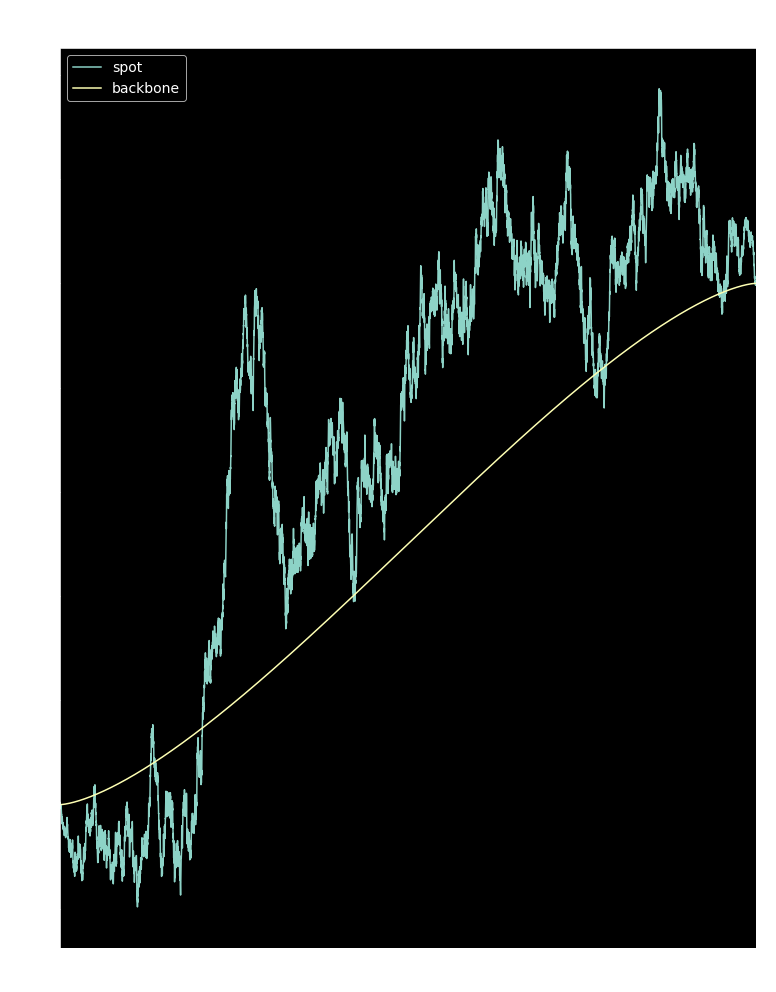

In [5]:
fig, ax = plt.subplots(nrows=1, ncols=1)

distr = stats.semicircular(loc=1.0, scale=1.0)

X = F_pinned_BM(x0=0.0, T=T, scheme_steps=SCHEME_STEPS, distr=distr, pin=1.0)
df = X.simulate()
df.plot(kind='line', ax=ax)

ax.set_xlabel('time')
ax.set_ylabel('spot')
ax.legend(loc='upper left')
ax.set_title('Semicircular backbone\n')

plt.tight_layout()
plt.show()

/home/sauxpa/anaconda3/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:390: RuntimeWarning: divide by zero encountered in true_divide
  return 1.0/np.pi/np.sqrt(x*(1-x))


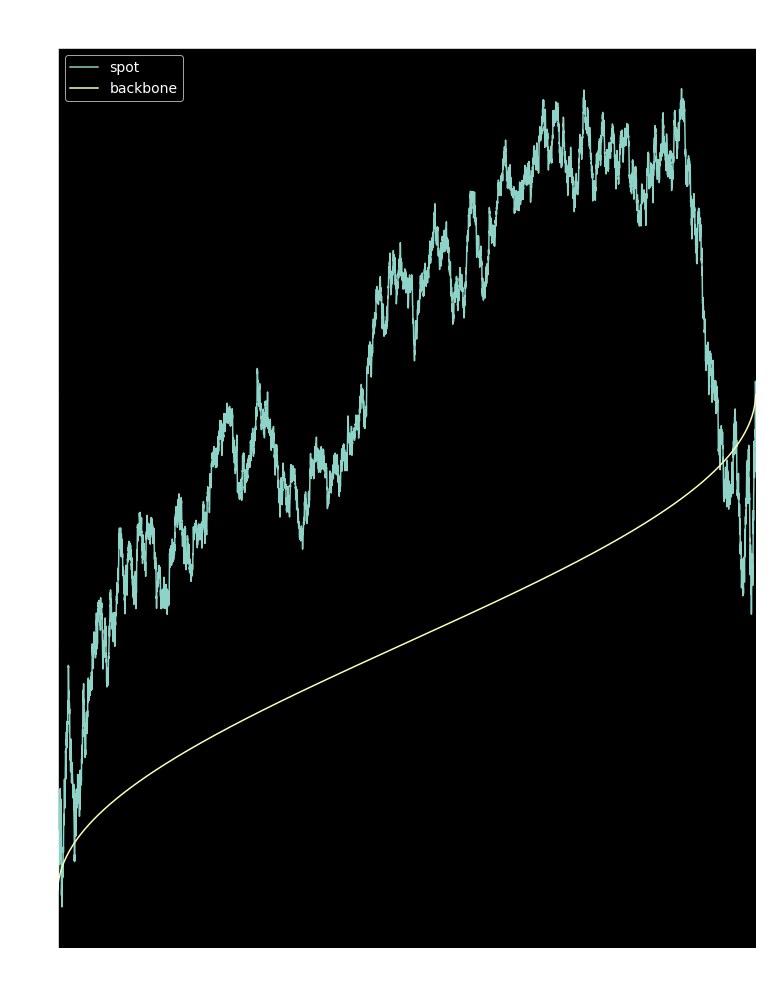

In [6]:
fig, ax = plt.subplots(nrows=1, ncols=1)

distr = stats.arcsine(loc=0.0, scale=T)

X = F_pinned_BM(x0=0.0, T=T, scheme_steps=SCHEME_STEPS, distr=distr, pin=1.0)
df = X.simulate()
df.plot(kind='line', ax=ax)

ax.set_xlabel('time')
ax.set_ylabel('spot')
ax.legend(loc='upper left')
ax.set_title('Arcsine backbone\n')

plt.tight_layout()
plt.show()